In [80]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('/Users/lia/Desktop/Upgrade_Hub/Temario/Modulo 1/1.4. Pandas/ejercicio_salarios/data/ds_salaries.csv')
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [34]:
df.columns #nombre de las columnas

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [35]:
df.dtypes #entender el tipo de datos que hay en cada columna

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [36]:
df.isnull().sum() #verifico si hay nulos

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [37]:
df.duplicated().sum() #verifico si hay duplicados

np.int64(1171)

In [38]:
df.shape[0] #tenia 1171 duplicados, con el shape veo que tenia 3755 filas en el dataset

3755

In [40]:
df.drop_duplicates(inplace=True) #eliminamos duplicados para que no interfieran en el analisis. 

In [41]:
df.duplicated().sum() #reviso si hay duplicados despues del delete

np.int64(0)

In [42]:
df.shape[0] #como es ahora mi df? ahora tiene 2584 filas

2584

### EDA


### Cual es el tipo de empleo que gana mas dinero?

In [43]:
#primero saco la media de salario por job title en descendente para ver cuales son los mayores
average_salary = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).round(2)
average_salary

job_title
Head of Machine Learning          6000000.00
Principal Data Architect          3000000.00
Lead Machine Learning Engineer    2548666.67
Lead Data Scientist                928485.33
Data Analytics Lead                922500.00
                                     ...    
Insight Analyst                     38500.00
Compliance Data Analyst             30000.00
Autonomous Vehicle Technician       26277.50
Staff Data Analyst                  15000.00
Product Data Scientist               8000.00
Name: salary, Length: 93, dtype: float64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
#paso a hacer el grafico, para ello, tengo que pasar a df los datos, hago el reset index para colocarlo
avg_salary_df = pd.DataFrame(average_salary).reset_index()
avg_salary_df.columns = ['job_title', 'salary']

#como son muchos job titles, selecciono un grupo de top 5 jobs y verifico que está ok la tabla
top10_salaries = df.nlargest(10, 'salary')
top10_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3669,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
3574,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3646,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3475,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
2966,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
3476,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
2358,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
3192,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
1462,2023,MI,FT,Head of Data Science,5000000,INR,60795,IN,50,IN,L


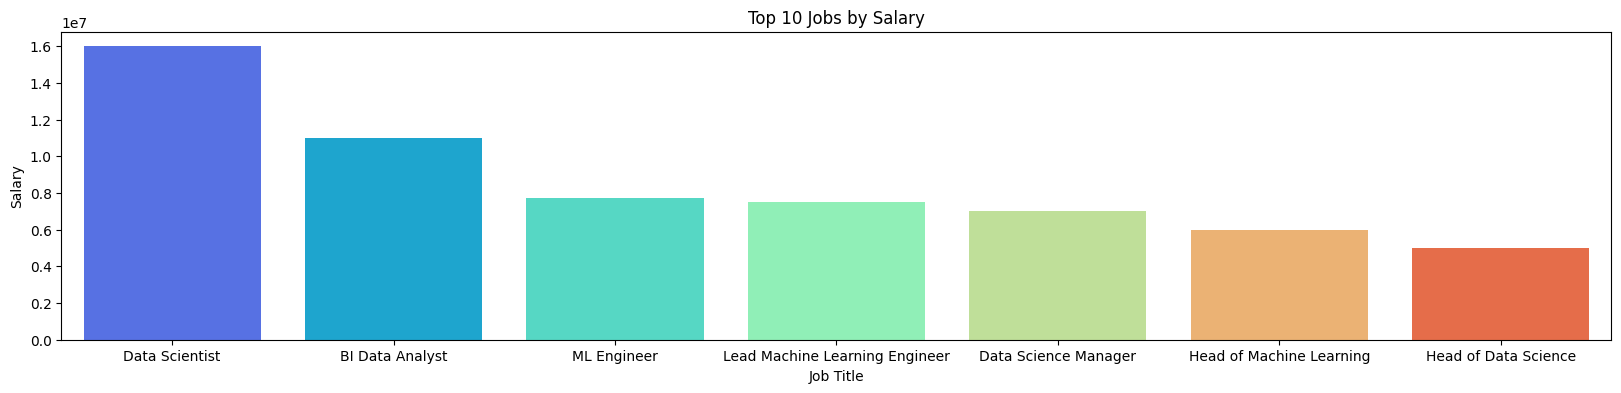

In [140]:
#paso a construir el grafico, voy a hacer un grafico de barras con la variable top 5 que cree antes
fig = plt.figure(figsize=(20, 4))
sns.barplot(x='job_title',y='salary',data=top10_salaries, palette='rainbow', hue='job_title', errorbar=None)
plt.xticks(rotation=0)
plt.title('Top 10 Jobs by Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

### Donde estan localizadas las companias que mas pagan?

In [71]:
df['salary'].max()

np.int64(30400000)

In [70]:
salario_medio_por_ubicacion = df.groupby('company_location')['salary'].mean()

ubicacion_empresa_mayor_salario = salario_medio_por_ubicacion.idxmax()

salario_maximo = salario_medio_por_ubicacion.max()

print(f'Las empresas que más pagan están ubicadas en {ubicacion_empresa_mayor_salario} siendo el salario mayor de {salario_maximo}')

Las empresas que más pagan están ubicadas en CL siendo el salario mayor de 30400000.0


In [87]:
df_salario_medio = pd.DataFrame(salario_medio_por_ubicacion)

Text(0, 0.5, 'Salary')

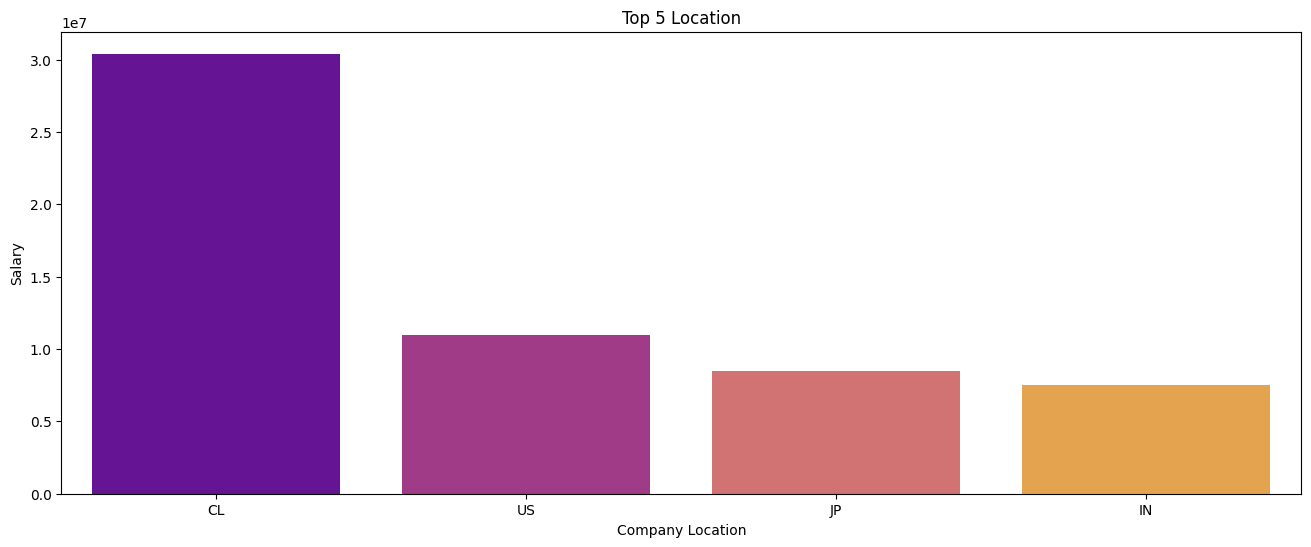

In [145]:
#hacemos el grafico basado en los top 10 salarios anteriores, comparando ahora con la company location
fig = plt.figure(figsize=(16, 6))
sns.barplot(x='company_location',y='salary',data=top5_salaries, palette='plasma', hue='company_location', errorbar=None)
plt.title('Top 5 Location')
plt.xlabel('Company Location')
plt.ylabel('Salary')


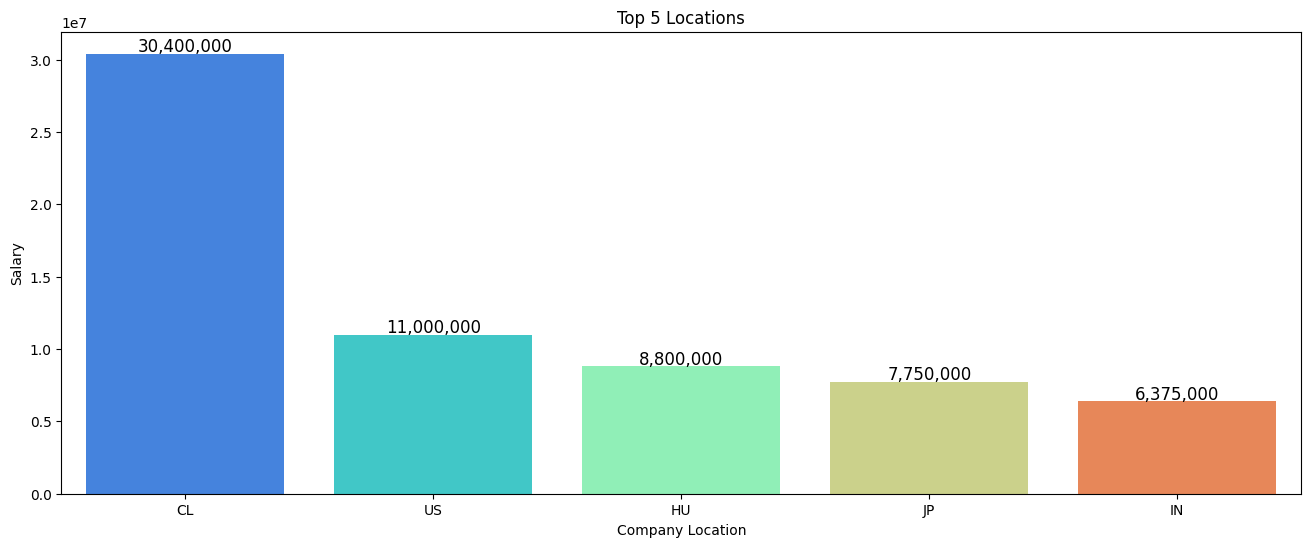

In [121]:

# Crear el gráfico de barras
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(x='company_location', y='salary', data=top5_salaries, palette='rainbow', hue='company_location', errorbar=None)

# Añadir el valor del salario dentro de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                ha='center', 
                va='center',  # Alineación vertical del texto
                fontsize=12, 
                color='black', 
                xytext=(0, 5),  # Mueve el texto hacia arriba
                textcoords='offset points')

# Añadir títulos y etiquetas
plt.title('Top 5 Locations')
plt.xlabel('Company Location')
plt.ylabel('Salary')

plt.show()


### Cual es el tipo de empleo que permite mas trabajo remoto?


In [20]:
df['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

In [21]:
df[df['remote_ratio'] == 100]['job_title'].value_counts()

job_title
Data Engineer                        287
Data Scientist                       237
Data Analyst                         194
Machine Learning Engineer             90
Analytics Engineer                    50
                                    ... 
BI Data Engineer                       1
Applied Machine Learning Engineer      1
Compliance Data Analyst                1
Data Quality Analyst                   1
Staff Data Scientist                   1
Name: count, Length: 75, dtype: int64

### salario promedio de Data Scientist

In [36]:
data_scientists = df[df['job_title'] == 'Data Scientist'] #primero saco el numero de data scientists, si el job title coincide
salario_medio = data_scientists['salary'].mean() #despues saco la media del salario de ese grupo
salario_medio

np.float64(286453.71375464683)

### ¿cuantas personas ganan por encima de los 200ks?

In [94]:
# Filtrar las personas que ganan más de 200,000 USD y contar el número de filas
above_200k_count = df[df['salary_in_usd'] > 200000].shape[0]
df[df['salary']>200000].shape[0]

450

In [25]:
len(df[df['salary']>200000])

450

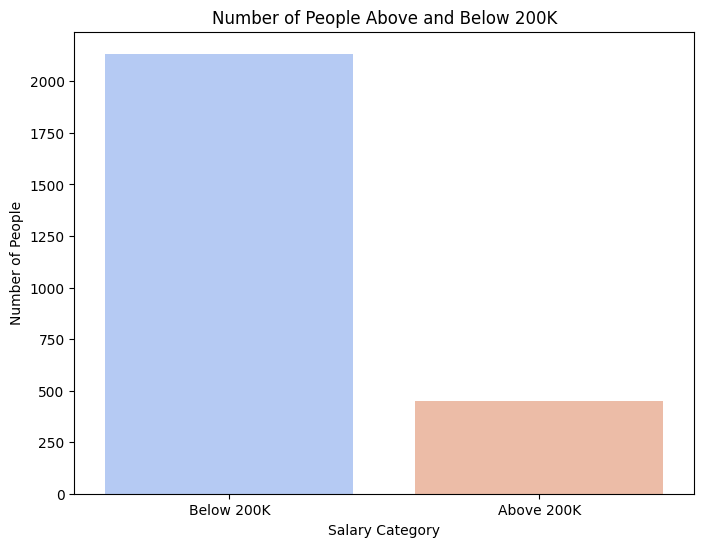

In [95]:
# Con el dato anterior, voy a visualizarlo para ver de todo el DataFrame cuantos estan por encima de 200K y por debajo para hacernos una idea del rango. 

# Crear categorías de salarios
df['salary_category'] = df['salary'].apply(lambda x: 'Above 200K' if x > 200000 else 'Below 200K')

# Contar cuántas personas hay en cada categoría
salary_count = df['salary_category'].value_counts()

# Crear gráfico de barras
fig = plt.figure(figsize=(8, 6))
sns.barplot(x=salary_count.index, y=salary_count.values, palette='coolwarm')

# Añadir títulos y etiquetas
plt.title('Number of People Above and Below 200K')
plt.xlabel('Salary Category')
plt.ylabel('Number of People')

plt.show()


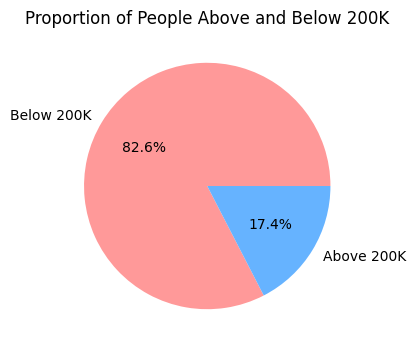

In [127]:
#hago lo mismo visualizado en piechart 
# Definir colores personalizados para el gráfico de pastel
colors = ['#ff9999', '#66b3ff']  # Rojo claro y azul claro

# Crear gráfico de pastel con los colores definidos
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(salary_count, labels=salary_count.index, autopct='%1.1f%%', colors=colors)

# Añadir título
plt.title('Proportion of People Above and Below 200K')

plt.show()



### ¿ cual es el salario promedio de los empleados Data Modeler en SE

In [47]:
df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]['salary_in_usd'].mean()

np.float64(118900.0)

#### # Voy a crear un grafico con el salario medio por pais

In [125]:
# Agrupar por país y calcular el salario medio
average_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Renombrar las columnas para mayor claridad
average_salary_by_country.columns = ['company_location', 'average_salary']

# Mostrar el resultado
print(average_salary_by_country)


   company_location  average_salary
0                AE   100000.000000
1                AL    10000.000000
2                AM    50000.000000
3                AR    25000.000000
4                AS    29351.000000
..              ...             ...
67               TH    23064.333333
68               TR    19058.000000
69               UA    57850.000000
70               US   152374.791602
71               VN    12000.000000

[72 rows x 2 columns]


In [123]:


# Supongamos que tu DataFrame se llama average_salary_by_country
# Y tiene las columnas 'country' y 'average_salary'

# Ejemplo de cómo podría verse el DataFrame
# average_salary_by_country = pd.DataFrame({
#     'country': ['Country A', 'Country B', 'Country C', 'Country D'],
#     'average_salary': [75000, 85000, 95000, 60000]
# })

# Crear el gráfico de dispersión
average_salary = df['salary_in_usd'].mean()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_salary_by_country, x='country', y='average_salary', palette='rainbow', s=100)

# Añadir títulos y etiquetas
plt.title('Average Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')

# Añadir el valor del salario medio encima de cada punto
for i in range(average_salary_by_country.shape[0]):
    plt.text(x=average_salary_by_country['country'][i], 
             y=average_salary_by_country['average_salary'][i], 
             s=f'{average_salary_by_country["average_salary"][i]:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.tight_layout()  # Ajusta el layout para que no se superpongan las etiquetas

plt.show()


np.float64(133409.28018575851)

Para los ML Engineer, que diferencia de salario hay entre full time y part time?

In [53]:
salary_FT = df[['employment_type', 'salary_in_usd']][df['job_title'] == 'ML Engineer'].groupby('employment_type').mean().loc['FT']
salary_PT = df[['employment_type', 'salary_in_usd']][df['job_title'] == 'ML Engineer'].groupby('employment_type').mean().loc['PT']

print(salary_FT - salary_PT) #diferencia en valor absoluto
print((salary_FT-salary_PT) / salary_FT) #me da el porcentaje
print(salary_FT/salary_PT) #me da las veces que gana mas (10 veces mas)

salary_in_usd    152117.9
dtype: float64
salary_in_usd    0.905012
dtype: float64
salary_in_usd    10.527615
dtype: float64


### Cual es el employment type mas frecuente entre los Business Data Analyst

In [57]:
df[df['job_title'] == 'Data Analyst']['employment_type'].value_counts().head()

employment_type
FT    390
PT      5
CT      1
Name: count, dtype: int64

In [58]:
df[df['job_title'] == 'Data Analyst']['employment_type'].mode()

0    FT
Name: employment_type, dtype: object

In [100]:
Business_Analyst_ET = pd.DataFrame(df[['employment_type','job_title']][df['job_title'] == 'Business Data Analyst'].value_counts()).reset_index()
Business_Analyst_ET

,employment_type,job_title,count
0,FT,Business Data Analyst,14
1,CT,Business Data Analyst,1


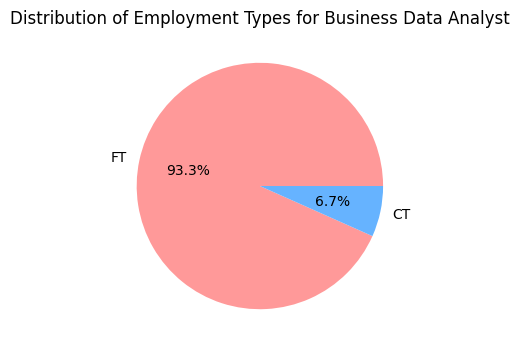

In [126]:

Business_Analyst_ET = df[df['job_title'] == 'Business Data Analyst']['employment_type'].value_counts().reset_index()

# Renombrar las columnas del DataFrame
Business_Analyst_ET.columns = ['employment_type', 'count']  # Asegúrate de que haya dos columnas

# Definir colores personalizados para el gráfico de pastel
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 

# Crear gráfico de pastel
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(Business_Analyst_ET['count'], labels=Business_Analyst_ET['employment_type'], autopct='%1.1f%%', colors=colors)

# Añadir título
plt.title('Distribution of Employment Types for Business Data Analyst')

plt.show()




### En qué país, en cuanto a localización de la compañía, hay mayor ratio de teletrabajo?

In [59]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df[['remote_ratio'] == 100]['company_location']

In [ ]:
df['remot_ration']

In [66]:
remote_per_country = df.groupby(['company_location'])['remote_ratio'].mean().sort_values(ascending=False)
remote_per_country[remote_per_country == 100]

company_location
PL    100.0
KE    100.0
MY    100.0
AR    100.0
PR    100.0
IR    100.0
NG    100.0
EG    100.0
PH    100.0
CR    100.0
SK    100.0
CL    100.0
CF    100.0
Name: remote_ratio, dtype: float64